<a href="https://colab.research.google.com/github/Sachinranasing/CM3604-Deep-Learning-Coursework/blob/main/Senti_with_DistilBERT_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!python --version

Mounted at /content/drive
Python 3.10.12


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%time df = pd.read_json("/content/drive/MyDrive/yelp_academic_dataset_review.json", encoding = 'ISO-8859-1', lines=True, nrows=10000)

CPU times: user 171 ms, sys: 70.2 ms, total: 241 ms
Wall time: 1.6 s


In [4]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [5]:
df.shape

(10000, 9)

In [6]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [7]:
df.stars.unique()
#How many unique star values are there
df.stars.value_counts()
#shows the distribution for each star value

5    4445
4    2574
3    1139
1    1079
2     763
Name: stars, dtype: int64

Text(0.5, 1.0, 'Precentage of Stars rating')

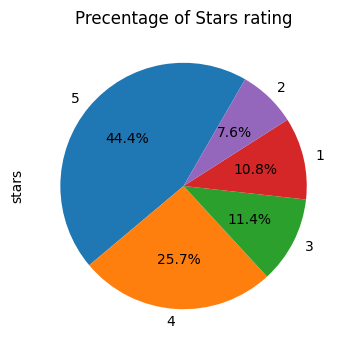

In [8]:
plt.figure(figsize=(4,4))
df["stars"].value_counts().plot.pie(autopct="%1.1f%%", startangle=60)
plt.title("Precentage of Stars rating")

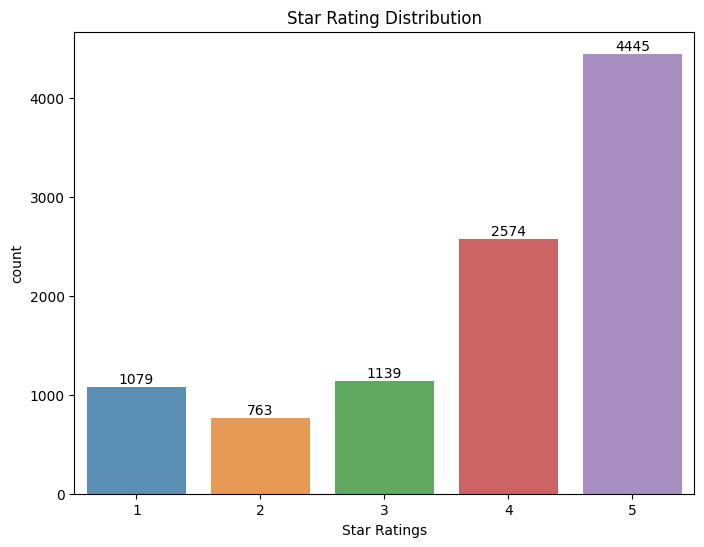

In [9]:
x=df['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(8,6))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('count')
plt.xlabel('Star Ratings')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [10]:
df["label"] = df["stars"].apply(lambda score: "positive" if score >= 3 else "negative")
df['label'] = df['label'].map({'positive':1, 'negative':0})

In [11]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,label
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1


In [12]:
new_df= df[['text', 'label']]

In [13]:
new_df

,text,label
0,"If you decide to eat here, just be aware it is...",1
1,I've taken a lot of spin classes over the year...,1
2,Family diner. Had the buffet. Eclectic assortm...,1
3,"Wow! Yummy, different, delicious. Our favo...",1
4,Cute interior and owner (?) gave us tour of up...,1
...,...,...
9995,Excellent food and service. The place is funct...,1
9996,Just about to get tucked into a meatloaf that ...,1
9997,Outstanding customer service! And my car is dr...,1
9998,I and my husband went here for Dinner one day ...,1


In [14]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=8e1761c2dd8d1f42ee88b725bdf4b02055621319ccede7142366a9b67be004b1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [15]:
from langdetect import detect
#import detect function from langdetect
nonen=new_df[new_df['text'].apply(detect)!='en']
#nonen is the dataframe of non-english user reviews

In [16]:
nonen

,text,label
830,"De vacaciones y sin ganas de cocinar, decidimo...",1
1906,City Parkã®è¿ãã«ããæ¿å®ããæ°·å±ã...,1
3369,Op suggestie van yelp- hier geweest op onze ee...,1
4281,Excelente comida mediterrÃ¡nea! El gyro es bue...,1
5717,Peter piper on roids. Good pizza,1
7748,Small quiet little place but didn't feel cramp...,1
8623,Sehr nettes kleines ruhiges typisches amerikan...,1
9237,ç¹äºåä¸ªè æ²¡ä¸ä¸ªå¥½åç ä¸éåä¸...,0
9933,BBQ good lawd have mercy !,1


In [17]:
yelp=new_df[new_df['text'].apply(detect)=='en']
#yelp is the data frame we will continue to work on.
#yelp only contains English reviews

In [18]:
yelp

,text,label
0,"If you decide to eat here, just be aware it is...",1
1,I've taken a lot of spin classes over the year...,1
2,Family diner. Had the buffet. Eclectic assortm...,1
3,"Wow! Yummy, different, delicious. Our favo...",1
4,Cute interior and owner (?) gave us tour of up...,1
...,...,...
9995,Excellent food and service. The place is funct...,1
9996,Just about to get tucked into a meatloaf that ...,1
9997,Outstanding customer service! And my car is dr...,1
9998,I and my husband went here for Dinner one day ...,1


In [19]:
yelp['text']=yelp['text'].str.lower()
#change all strings to be lower
yelp['text']=yelp['text'].str.replace('[^\w\s]','')
#get rid of unwanted characters such as punctuation marks
yelp['text']=yelp['text'].str.replace('\d+','')
#removing numerals
yelp['text']=yelp['text'].str.replace('\n',' ').str.replace('\r','')

<ipython-input-19-7e17cbb29105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.lower()
<ipython-input-19-7e17cbb29105>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  yelp['text']=yelp['text'].str.replace('[^\w\s]','')
<ipython-input-19-7e17cbb29105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.replace('[^\w\s]','')
<ipython-input-19-7e17cbb29105>:5: FutureWarning: The default value of regex 

In [20]:
yelp

,text,label
0,if you decide to eat here just be aware it is ...,1
1,ive taken a lot of spin classes over the years...,1
2,family diner had the buffet eclectic assortmen...,1
3,wow yummy different delicious our favorite...,1
4,cute interior and owner gave us tour of upcom...,1
...,...,...
9995,excellent food and service the place is functi...,1
9996,just about to get tucked into a meatloaf that ...,1
9997,outstanding customer service and my car is dri...,1
9998,i and my husband went here for dinner one day ...,1


In [21]:
yelp.label.value_counts()

1    8150
0    1840
Name: label, dtype: int64

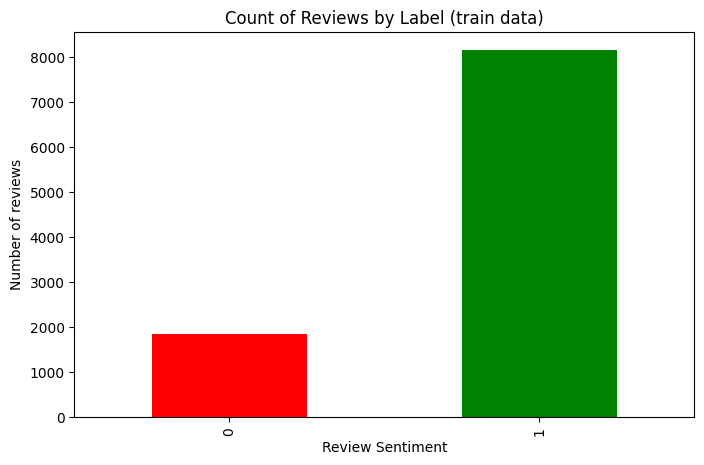

In [22]:
ax = yelp['label'].value_counts().sort_index() \
     .plot (kind='bar',
     title='Count of Reviews by Label (train data)',
     figsize=(8, 5), color = ['red', 'green'])

ax.set_xlabel('Review Sentiment')
ax.set_ylabel ('Number of reviews')
plt.show()